# **Import Library**

In [1]:
!pip install dython
!pip install matplotlib==3.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from dython.nominal import associations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

# **Business Understanding**

- projek dari sebuah lending company
- mengembangkan model ML yang dapat **memprediksi kelayakan peminjaman**
- menggunakan dataset dimana terdiri dari data **pinjaman yang diterima dan ditolak** yang disediakan oleh company .

**# Persiapan Data**

In [3]:
df_loan = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv',low_memory=False)

In [4]:
df_loan.shape

(466285, 75)

## Melihat Sampel dan Deskripsi Data

untuk mengetahui seperti apa nilai yang terdapat pada semua kolom

In [5]:
df_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

**Deskripsi Data** 

dapat dilihat pada data dictionary (format xlsx) yang berisikan informasi mengenai masing-masing kolom yang ada pada file data

In [6]:
data_loan_dict = pd.read_excel("LCDataDictionary.xlsx", sheet_name="LoanStats")
data_loan_dict.dropna(inplace=True)
data_loan_dict.rename(columns={"Unnamed: 0":'Fitur', "Unnamed: 2":'Deskripsi',}, inplace=True)

In [7]:
data_loan_dict[['Fitur', 'Deskripsi']]

,Fitur,Deskripsi
0,_rec,Jumlah total yang dilakukan oleh investor untuk pinjaman itu pada saat itu.
1,acc_now_delinq,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,Negara yang disediakan oleh peminjam dalam aplikasi pinjaman
3,all_util,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,Penghasilan tahunan yang dilaporkan sendiri yang disediakan oleh peminjam selama pendaftaran.
5,annual_inc_joint,Penghasilan tahunan yang dilaporkan sendiri gabungan yang disediakan oleh co-peminjam selama pendaftaran
7,collection_recovery_fee,Biaya pengumpulan biaya penagihan
8,collections_12_mths_ex_med,Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis
9,delinq_2yrs,Jumlah 30+ hari insiden kenakalan yang lewat dalam file kredit peminjam selama 2 tahun terakhir
10,desc,Deskripsi pinjaman yang disediakan oleh peminjam


In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# **Exploratory Data Analysis**

In [10]:
dfl = df_loan.copy()
dfl2 = df_loan.copy()

In [11]:
dfl.shape

(466285, 75)

In [12]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

semua feature yang nilainya null di drop untuk mempermudah proses EDA

In [13]:
null = dfl.isnull().sum().sort_values()
null = null[null == dfl.shape[0]]
null = list(null.index)

#lihat dimensi dataset
print('dimensi dataset sebelum drop = ',dfl.shape)

#drop feature yang semua isinya nilai null
dfl.drop(columns=null,inplace=True)

#lihat dimensi dataset
print('dimensi dataset setelah drop = ',dfl.shape)

dimensi dataset sebelum drop =  (466285, 75)
dimensi dataset setelah drop =  (466285, 58)


memisahkan feature data yang bertipe numerical dengan categorical

In [14]:
feat_nums = []
feat_cats = []
for i in dfl.columns:
  if dfl[i].dtype == 'object':
    feat_cats.append(i)
  else:
    feat_nums.append(i)
print('jumlah = ',len(feat_nums))
print('feat_nums = ',feat_nums)
print('jumlah = ',len(feat_cats))
print('feat_cats = ',feat_cats)

jumlah =  36
feat_nums =  ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
jumlah =  22
feat_cats =  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [15]:
dfl[feat_cats].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276






*   Untuk feature `issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d,` dan `last_credit_pull_d `tipe datanya dapat diubah ke datetime
*   Feature `application_type` juga tidak akan digunakan karena hanya memiliki 1 nilai unik, sehingga tidak ada informasi yang dapat diperoleh dari feature tersebut.





In [16]:
#drop
dfl.drop(columns=['application_type'],inplace=True)

In [17]:
dfl.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_li

In [18]:
feat_cats= []
for i in dfl.columns:
  if dfl[i].dtype=='object':
    feat_cats.append(i)

conv_date = []
fc_new = []
for i in feat_cats:
  if dfl[i].nunique() > 35:
    conv_date.append(i)
  else:
    fc_new.append(i)

feat_cats = fc_new.copy()

In [19]:
print(feat_cats)
print(conv_date)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']
['emp_title', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [20]:
conv_date.remove('emp_title')
print(conv_date)

['issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [21]:
del conv_date[1:6]
print(conv_date)

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [22]:
print(feat_cats)
print(conv_date)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status']
['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [23]:
#mengurutkan data pada feature emp_length
length = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
dfl['emp_length'] = pd.Categorical(dfl['emp_length'], categories=length, ordered=True)

In [24]:
#mengurutkan data pada feature grade
temp = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
dfl['grade'] = pd.Categorical(dfl['grade'], categories=temp, ordered=True)

In [25]:
#mengurutkan data pada feature emy_length
temp = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5']
dfl['sub_grade'] = pd.Categorical(dfl['sub_grade'], categories=temp, ordered=True)

**Feature Term**

In [26]:
term = dfl.groupby('term').agg({'id':'count'}).reset_index()
term.columns=['term','total']
term['%'] = round(term.total*100/sum(term.total),3)
term

,term,total,%
0,36 months,337953,72.478
1,60 months,128332,27.522


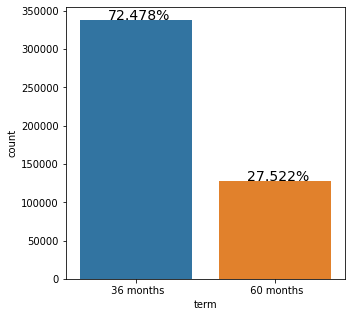

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x=dfl['term'])
plt.text(x=-0.2,y=337953,s='72.478%',fontsize=14)
plt.text(x=0.8,y=128332,s='27.522%',fontsize=14)
plt.show()

Feature `term` didominasi dengan persentase 72.478% oleh label '36 month'  dari total populasi.

**Feature grade dan sub_grade**

In [28]:
grade = dfl.groupby('grade').agg({'id':'count'}).reset_index()
grade.columns=['grade','total']
grade['%'] = round(grade.total*100/sum(grade.total),3)
grade

,grade,total,%
0,A,74867,16.056
1,B,136929,29.366
2,C,125293,26.870
3,D,76888,16.489
4,E,35757,7.668
5,F,13229,2.837
6,G,3322,0.712


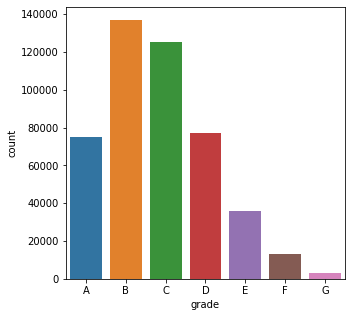

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x=dfl['grade'])
plt.show()

Feature grade didominasi oleh label 'B' dan 'C' yang masing-masing memiliki persentase 29.366% dan 26.870% dari jumlah total populasi

In [30]:
sub_grade = dfl.groupby('sub_grade').agg({'id':'count'}).reset_index()
sub_grade.columns=['sub_grade','total']
sub_grade['%'] = round(sub_grade.total*100/sum(sub_grade.total),3)
sub_grade

,sub_grade,total,%
0,A1,10541,2.261
1,A2,10956,2.350
2,A3,12568,2.695
3,A4,19045,4.084
4,A5,21757,4.666
5,B1,22876,4.906
6,B2,26610,5.707
7,B3,31686,6.795
8,B4,30505,6.542
9,B5,25252,5.416


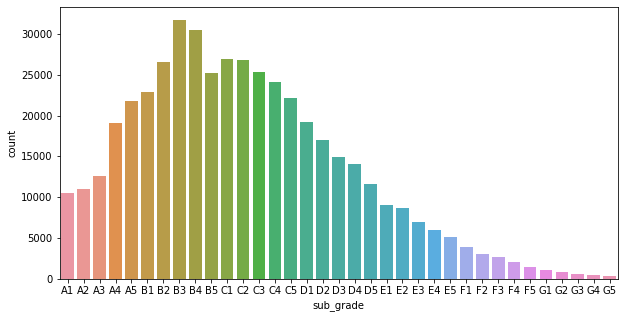

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=dfl['sub_grade'])
plt.show()

Pada feature `sub_grade` didominasi oleh label **'B2' dan 'B3'** dengan persentase masing-masing sebesar 5.707% dan 6.795% dari jumlah total populasi

**Feature emp_length**

In [32]:
emp_length = dfl.groupby('emp_length').agg({'id':'count'}).reset_index()
emp_length.columns=['emp_length','total']
emp_length['%'] = round(emp_length.total*100/sum(emp_length.total),3)
emp_length

,emp_length,total,%
0,< 1 year,36265,8.144
1,1 year,29622,6.652
2,2 years,41373,9.292
3,3 years,36596,8.219
4,4 years,28023,6.293
5,5 years,30774,6.911
6,6 years,26112,5.864
7,7 years,26180,5.879
8,8 years,22395,5.029
9,9 years,17888,4.017


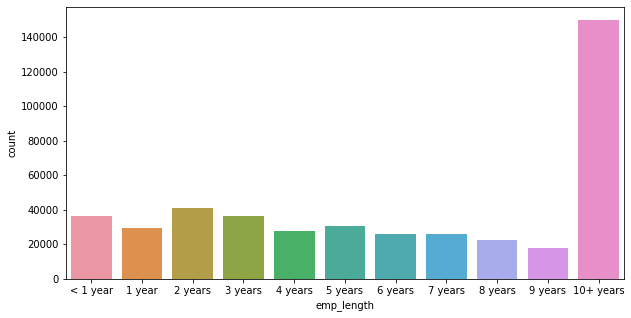

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x=dfl['emp_length'])
plt.show()

Feature `emp_length` didominasi dengan label '10+ years' dengan persentase sebesar 33.698% dari jumlah total populasi

**Feature home_ownership**

In [34]:
home_ownership = dfl.groupby('home_ownership').agg({'id':'count'}).reset_index()
home_ownership.columns=['home_ownership','total']
home_ownership['%'] = round(home_ownership.total*100/sum(home_ownership.total),3)
home_ownership=home_ownership.sort_values('%',ascending=False)
home_ownership

,home_ownership,total,%
1,MORTGAGE,235875,50.586
5,RENT,188473,40.420
4,OWN,41704,8.944
3,OTHER,182,0.039
2,NONE,50,0.011
0,ANY,1,0.000


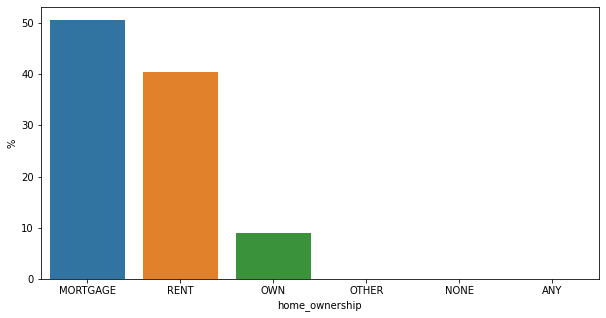

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=home_ownership['home_ownership'],y=home_ownership['%'])
plt.show()

Feature `home_ownership` didominasi oleh label MORTGAGE dengan persentase 50.586% dari jumlah total populasi. Label NONE dan ANY dapat digabungkan dengan label OTHER. Sebagian besar peminjam mendelegasikan rumahnya sebagai jaminan pinjaman, sedangkan hanya sedikit dari peminjam yang memiliki rumah sendiri.

**Feature pymnt_plan**

In [36]:
pymnt_plan = dfl.groupby('pymnt_plan').agg({'id':'count'}).reset_index()
pymnt_plan.columns=['pymnt_plan','total']
pymnt_plan['%'] = round(pymnt_plan.total*100/sum(pymnt_plan.total),3)
pymnt_plan=pymnt_plan.sort_values('%',ascending=False)
pymnt_plan

,pymnt_plan,total,%
0,n,466276,99.998
1,y,9,0.002


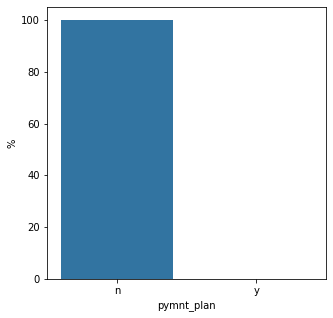

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(x=pymnt_plan['pymnt_plan'],y=pymnt_plan['%'])
plt.show()

Feature `pymnt_plan` didominasi oleh label n dengan persentase sebesar 99.998% dari jumlah total populasi. Imbalance ekstreme

**Feature Purpose**

In [38]:
purpose = dfl.groupby('purpose').agg({'id':'count'}).reset_index()
purpose.columns=['purpose','total']
purpose['%'] = round(purpose.total*100/sum(purpose.total),3)
purpose=purpose.sort_values('%',ascending=False)
purpose

,purpose,total,%
2,debt_consolidation,274195,58.804
1,credit_card,104157,22.338
4,home_improvement,26537,5.691
9,other,23690,5.081
6,major_purchase,9828,2.108
11,small_business,7013,1.504
0,car,5397,1.157
7,medical,4602,0.987
8,moving,2994,0.642
12,vacation,2487,0.533


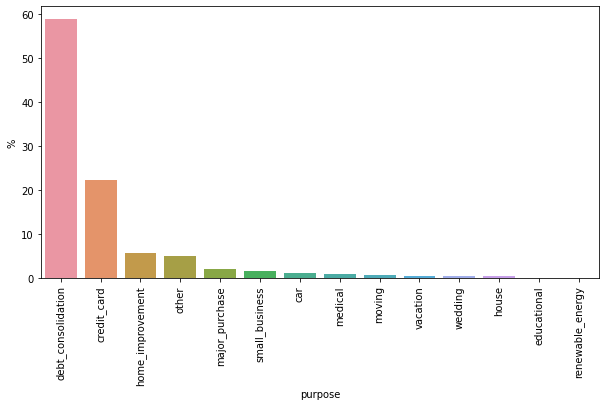

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=purpose['purpose'],y=purpose['%'])
plt.xticks(rotation=90)
plt.show()



Feature `purpose` didominasi label debt_consolidation dengan persentase 58.804% dari jumlah total populasi


**Feature initial_list_status**

In [40]:
initial_list_status = dfl.groupby('initial_list_status').agg({'id':'count'}).reset_index()
initial_list_status.columns=['initial_list_status','total']
initial_list_status['%'] = round(initial_list_status.total*100/sum(initial_list_status.total),3)
initial_list_status=initial_list_status.sort_values('%',ascending=False)
initial_list_status

,initial_list_status,total,%
0,f,303005,64.983
1,w,163280,35.017


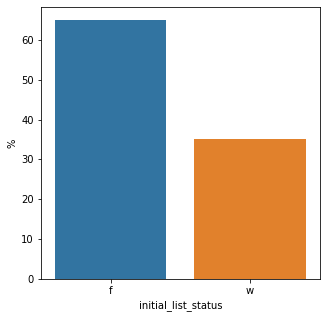

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x=initial_list_status['initial_list_status'],y=initial_list_status['%'])
plt.show()



Feature `initial_list_status` didominasi oleh label f dengan presentase sebesar 64.983% dari jumlah total populas

**Analisis:**

- Feature `term` didominasi oleh label 36 months
- Feature `grade` didominasi oleh label B dan C
-Feature `sub_grade` didominasi oleh sub dari label B dan C
-Feature `emp_length` didominasi oleh user yang bekerja 10 tahun ke atas
-Feature `home_ownership` didominasi oleh label MORTGAGE. Label NONE dan ANY dapat digabungkan dengan label OTHER
-Feature `verification_status` label Verified paling tinggi
-Feature `pymnt_plan` didominasi label n (imbalance ekstrem)
-Feature `purpose` didominasi label debt_consolidation
-Feature `initial_list_status` didominasi label f


**Olah data dengan fitur Date**

In [42]:
dfl[conv_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


Memisahkan feature month dan year

In [43]:
dfl['issue_d_month'] = dfl.issue_d.str[:3]
dfl['issue_d_year'] = np.where(dfl.issue_d.str[4:].astype('float64')>30,'19'+ dfl.issue_d.str[4:],'20'+ dfl.issue_d.str[4:])

dfl['earliest_cr_line_month'] = dfl.earliest_cr_line.str[:3]
dfl['earliest_cr_line_year'] = np.where(dfl.earliest_cr_line.str[4:].astype('float64')>30,'19'+ dfl.earliest_cr_line.str[4:],'20'+ dfl.earliest_cr_line.str[4:])

dfl['last_pymnt_d_month'] = dfl.last_pymnt_d.str[:3]
dfl['last_pymnt_d_year'] = np.where(dfl.last_pymnt_d.str[4:].astype('float64')>30,'19'+ dfl.last_pymnt_d.str[4:],'20'+ dfl.last_pymnt_d.str[4:])

dfl['next_pymnt_d_month'] = dfl.next_pymnt_d.str[:3]
dfl['next_pymnt_d_year'] = np.where(dfl.next_pymnt_d.str[4:].astype('float64')>30,'19'+ dfl.next_pymnt_d.str[4:],'20'+ dfl.next_pymnt_d.str[4:])

dfl['last_credit_pull_d_month'] = dfl.last_credit_pull_d.str[:3]
dfl['last_credit_pull_d_year'] = np.where(dfl.last_credit_pull_d.str[4:].astype('float64')>30,'19'+ dfl.last_credit_pull_d.str[4:],'20'+ dfl.last_credit_pull_d.str[4:])

In [44]:
dfl[['issue_d_month','issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year',
     'last_pymnt_d_month', 'last_pymnt_d_year', 'next_pymnt_d_month','next_pymnt_d_year', 
     'last_credit_pull_d_month','last_credit_pull_d_year']].head()

,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,Dec,2011,Jan,1985,Jan,2015,NaN,NaN,Jan,2016
1,Dec,2011,Apr,1999,Apr,2013,NaN,NaN,Sep,2013
2,Dec,2011,Nov,2001,Jun,2014,NaN,NaN,Jan,2016
3,Dec,2011,Feb,1996,Jan,2015,NaN,NaN,Jan,2015
4,Dec,2011,Jan,1996,Jan,2016,Feb,2016,Jan,2016


In [45]:
dfl[['issue_d','issue_d_month','issue_d_year',
     'earliest_cr_line','earliest_cr_line_month','earliest_cr_line_year',
     'last_pymnt_d','last_pymnt_d_month','last_pymnt_d_year',
     'next_pymnt_d','next_pymnt_d_month','next_pymnt_d_year',
     ]].isnull().sum()

issue_d                        0
issue_d_month                  0
issue_d_year                   0
earliest_cr_line              29
earliest_cr_line_month        29
earliest_cr_line_year         29
last_pymnt_d                 376
last_pymnt_d_month           376
last_pymnt_d_year            376
next_pymnt_d              227214
next_pymnt_d_month        227214
next_pymnt_d_year         227214
dtype: int64

In [46]:
#menurutkan data pada feature emy_length
temp = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month = ['issue_d_month', 'earliest_cr_line_month','last_pymnt_d_month','next_pymnt_d_month','last_credit_pull_d_month']
for i in month:
  dfl[i] = pd.Categorical(dfl[i], categories=temp, ordered=True)

**Feature issue_d_year**

In [47]:
a = dfl.groupby(['issue_d_year']).agg({'id':'count'}).rename(columns={'id':'total'}).reset_index()
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,issue_d_year,total,%
0,2007,603,0.129
1,2008,2393,0.513
2,2009,5281,1.133
3,2010,12537,2.689
4,2011,21721,4.658
5,2012,53367,11.445
6,2013,134755,28.900
7,2014,235628,50.533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


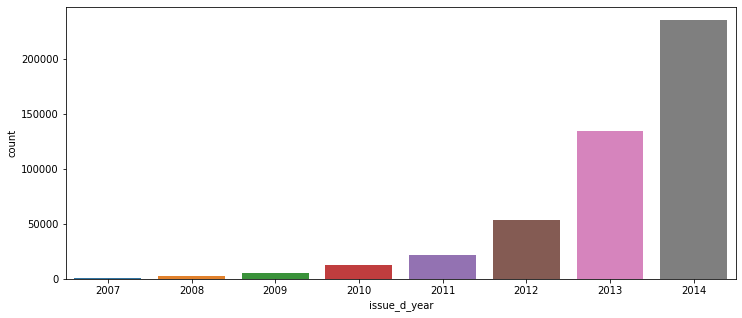

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(dfl['issue_d_year'].sort_values())
plt.show()

**Feature earliest_cr_line_year**

In [49]:
b = dfl.groupby(['earliest_cr_line_year']).agg({'id':'count'}).rename(columns={'id':'total'}).reset_index()
b['%'] = round(b['total']*100/sum(b['total']),3)
b

,earliest_cr_line_year,total,%
0,1944,1,0.000
1,1946,2,0.000
2,1948,1,0.000
3,1949,1,0.000
4,1950,4,0.001
5,1951,3,0.001
6,1953,3,0.001
7,1954,4,0.001
8,1955,7,0.002
9,1956,6,0.001


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


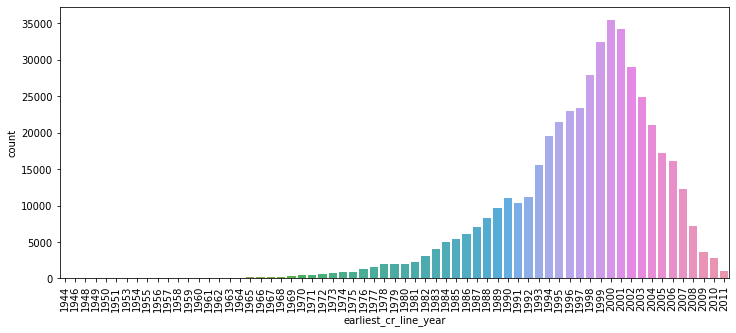

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(dfl['earliest_cr_line_year'].sort_values())
plt.xticks(rotation=90)
plt.show()

Feature `earlies_cr_line_year` distribusi datanya negatively skewed

**Feature last_pymnt_d_year**

In [51]:
c = dfl.groupby(['last_pymnt_d_year']).agg({'id':'count'}).rename(columns={'id':'total'}).reset_index()
c['%'] = round(c['total']*100/sum(c['total']),3)
c

,last_pymnt_d_year,total,%
0,2007,2,0.000
1,2008,335,0.072
2,2009,838,0.180
3,2010,2420,0.519
4,2011,5748,1.234
5,2012,11813,2.535
6,2013,27194,5.837
7,2014,66595,14.294
8,2015,171344,36.776
9,2016,179620,38.553


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


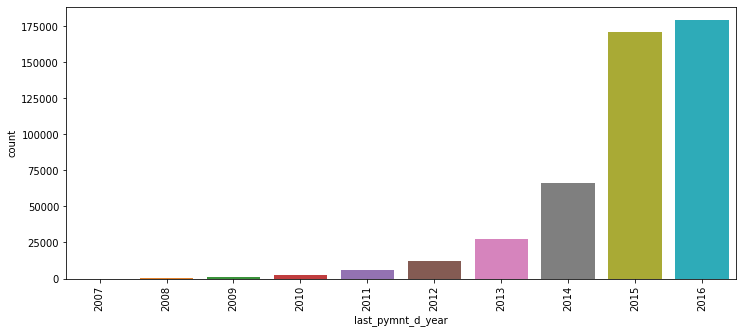

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(dfl['last_pymnt_d_year'].sort_values())
plt.xticks(rotation=90)
plt.show()

**Feature next_pymnt_d_year**

In [53]:
d = dfl.groupby(['next_pymnt_d_year']).agg({'id':'count'}).rename(columns={'id':'total'}).reset_index()
d['%'] = round(d['total']*100/sum(d['total']),3)
d

,next_pymnt_d_year,total,%
0,2007,1,0.000
1,2008,105,0.044
2,2009,312,0.131
3,2010,515,0.215
4,2011,820,0.343
5,2012,472,0.197
6,2013,372,0.156
7,2014,63,0.026
8,2015,79,0.033
9,2016,236332,98.854


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


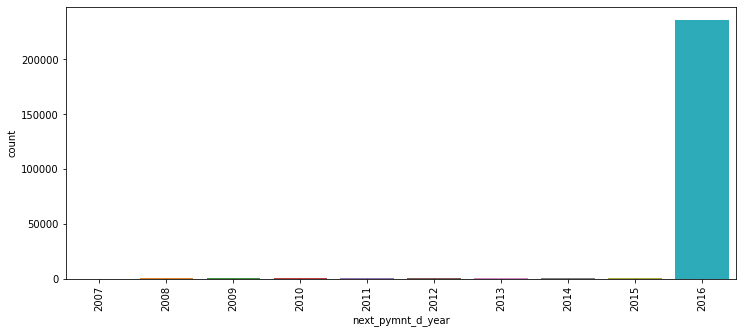

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(dfl['next_pymnt_d_year'].sort_values())
plt.xticks(rotation=90)
plt.show()

Feature `next_payment_d_year` 98.854% dari jumlah total populasi didominasi oleh label tahun 2016

**Feature last_credit_pull_d_year**

In [55]:
e = dfl.groupby(['last_credit_pull_d_year']).agg({'id':'count'}).rename(columns={'id':'total'}).reset_index()
e['%'] = round(d['total']*100/sum(d['total']),3)
e

,last_credit_pull_d_year,total,%
0,2007,58,0.000
1,2008,62,0.044
2,2009,394,0.131
3,2010,1151,0.215
4,2011,2691,0.343
5,2012,5313,0.197
6,2013,12448,0.156
7,2014,31403,0.026
8,2015,85024,0.033
9,2016,327699,98.854


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


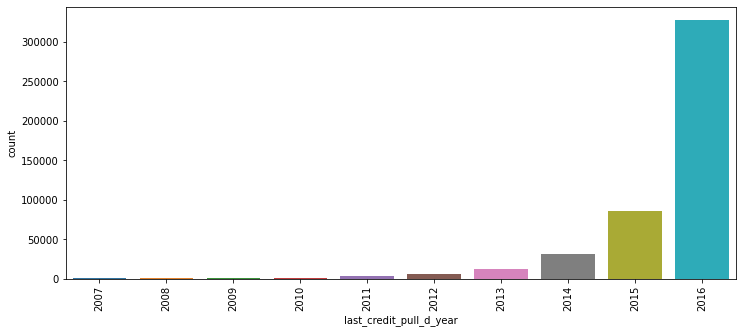

In [56]:
plt.figure(figsize=(12,5))
sns.countplot(dfl['last_credit_pull_d_year'].sort_values())
plt.xticks(rotation=90)
plt.show()

Feature `last_credit_pull_d_year` 70.285% dari jumlah total populasi didominasi oleh label tahun 2016


**Feature loan_status**

In [57]:
loan_status = dfl.groupby('loan_status').agg({'id':'count'}).reset_index()
loan_status.columns=['loan_status','total']
loan_status['%'] = round(loan_status.total*100/sum(loan_status.total),3)
loan_status=loan_status.sort_values('%',ascending=False)
loan_status

,loan_status,total,%
1,Current,224226,48.088
5,Fully Paid,184739,39.619
0,Charged Off,42475,9.109
8,Late (31-120 days),6900,1.480
6,In Grace Period,3146,0.675
4,Does not meet the credit policy. Status:Fully Paid,1988,0.426
7,Late (16-30 days),1218,0.261
2,Default,832,0.178
3,Does not meet the credit policy. Status:Charged Off,761,0.163


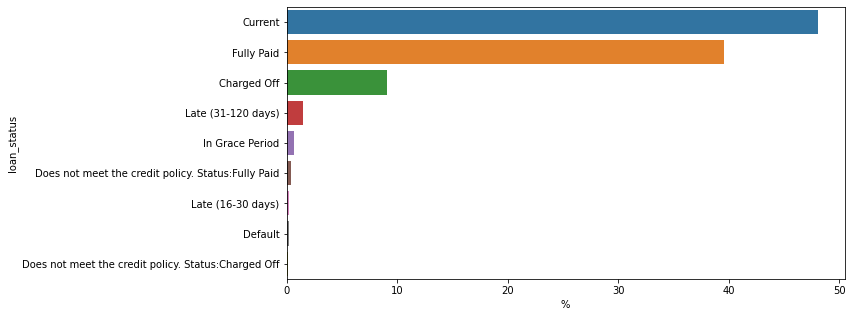

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=loan_status['%'],y=loan_status['loan_status'])
plt.show()

Sebagian besar pinjaman berada dalam status "sedang berjalan". Pada tingkat keberhasilan, pinjaman yang berhasil dibayarkan kembali memiliki rasio yang lebih tinggi ketimbang pinjaman yang terlambat.


**Menentukan Status Pinjaman**

Tujuan kita disini adalah menentukan pinjaman mana yang berkemungkinan untuk gagal bayar, sehingga kategori yang bisa kita ambil adalah diantara yang berhasil dan yang gagal. Oleh karena itu kita hanya akan mengambil 2 kategori yaitu:

* Disetujui, terdiri dari: Fully Paid
* Ditolak, terdiri dari: Charged Off, Default, dan Does not meet the credit policy

Kita tidak bisa menggunakan current karena pinjaman tersebut masih berlangsung, begitu pula dengan late dan in_grace_period.


In [59]:
#fungsi plot
title_font = dict(size=20, weight="bold")

def plot_count(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.countplot(data=df, y=y, order=value_counts.index, **sns_kwargs)
    plt.ylabel("")
    plt.show()

    print(percentage)


In [60]:
# inisialisasi variabel dari fitur status pinjaman
approved = ["Fully Paid"]
dissaproved = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

In [61]:
# Ganti fitur dengan label baru
def label_loan_status(value):
    if value in approved:
        return 1
    return 0

label_loan_status("Fully Paid")

1

In [62]:
# Terapkan fungsi
inter_df = dfl2[dfl2["loan_status"].isin(approved + dissaproved)].copy()
inter_df["loan_status"] = inter_df["loan_status"].apply(label_loan_status)

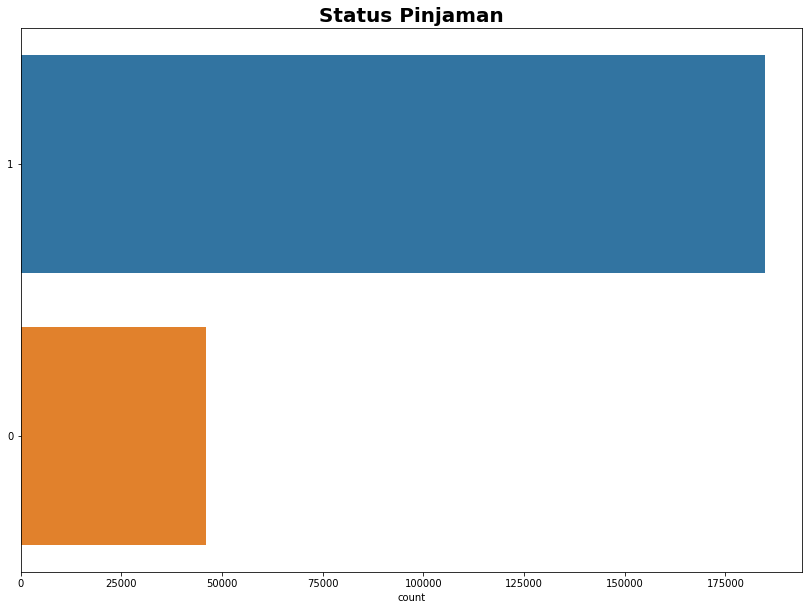

1    80.04%
0    19.96%
Name: loan_status, dtype: object


In [63]:
plot_count(inter_df, y="loan_status", title="Status Pinjaman")


## **Korelasi antar Variabel**

In [64]:
# Hitung korelasi tiap variabel
corrs = (inter_df.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [65]:
corrs["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


In [66]:
# Saring korelasi antara vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = corrs.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

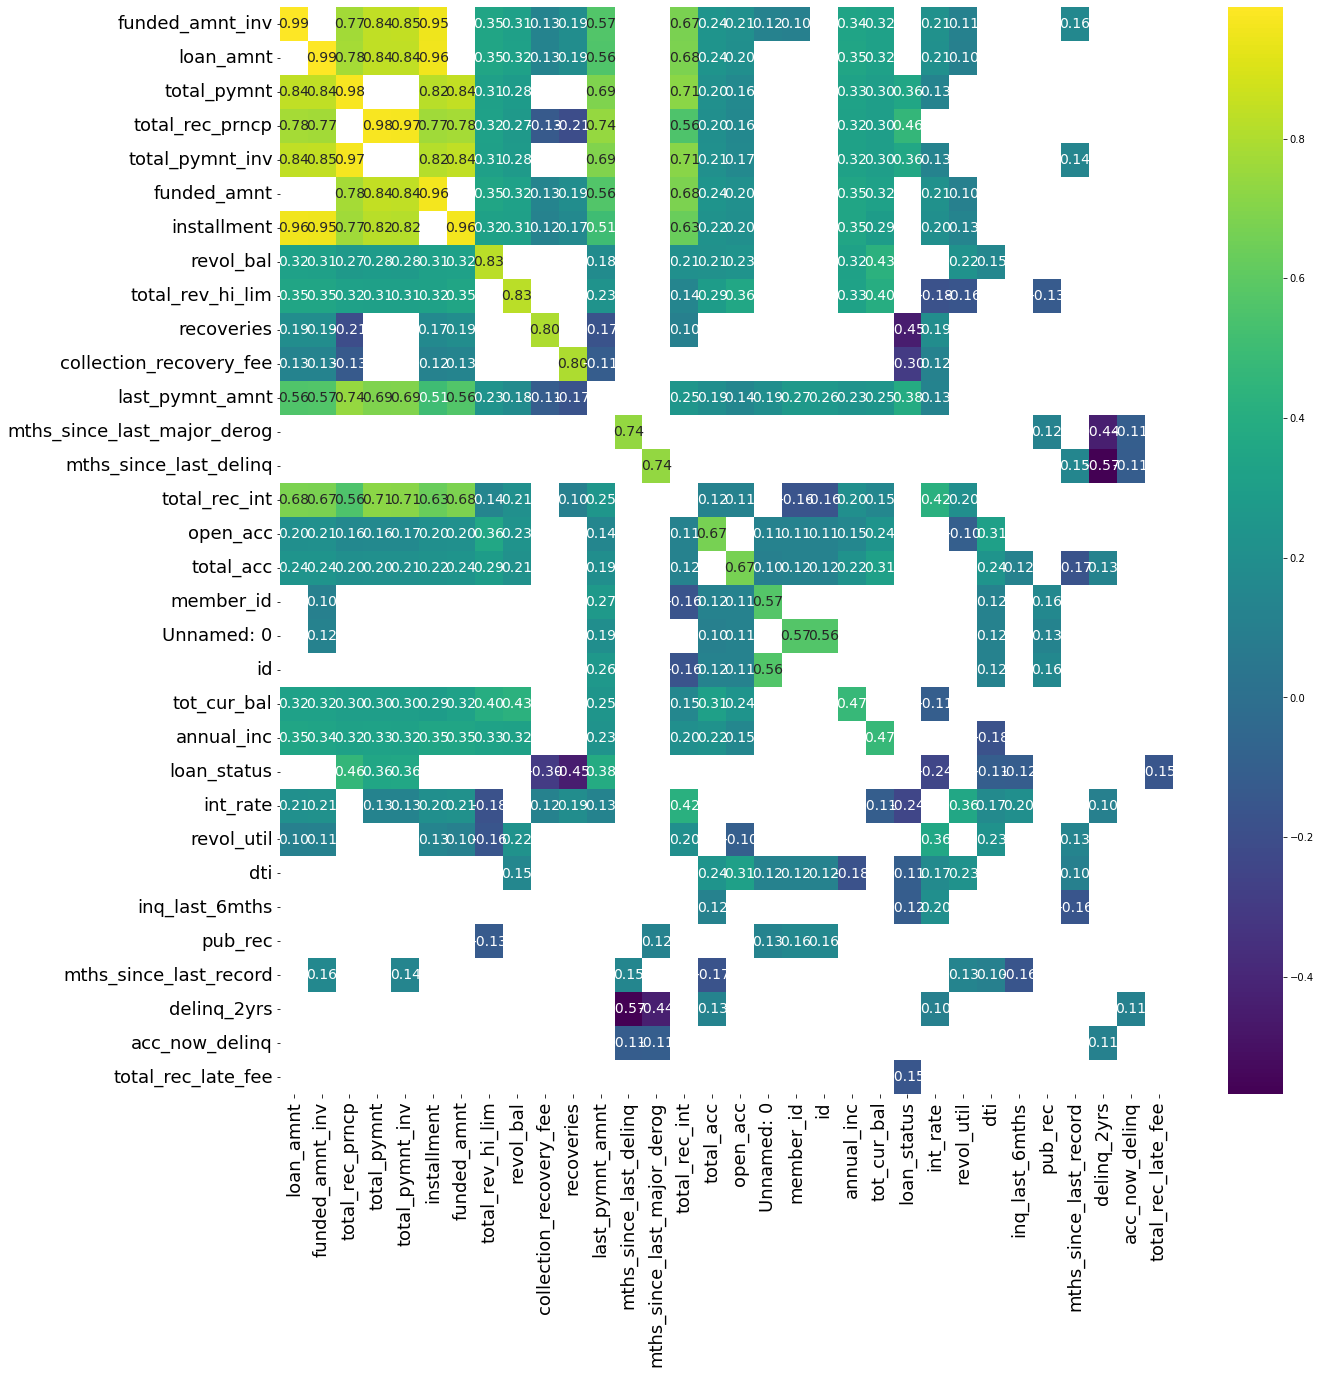

In [67]:
# plotting korelasi dengan heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr, 
    annot=True,
    fmt=".2f", 
    cmap="viridis", 
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

In [68]:
# Buat filter untuk membentuk matriks segitiga bawah
filter = np.zeros_like(trimmed_corr)
filter[np.triu_indices_from(filter)] = True

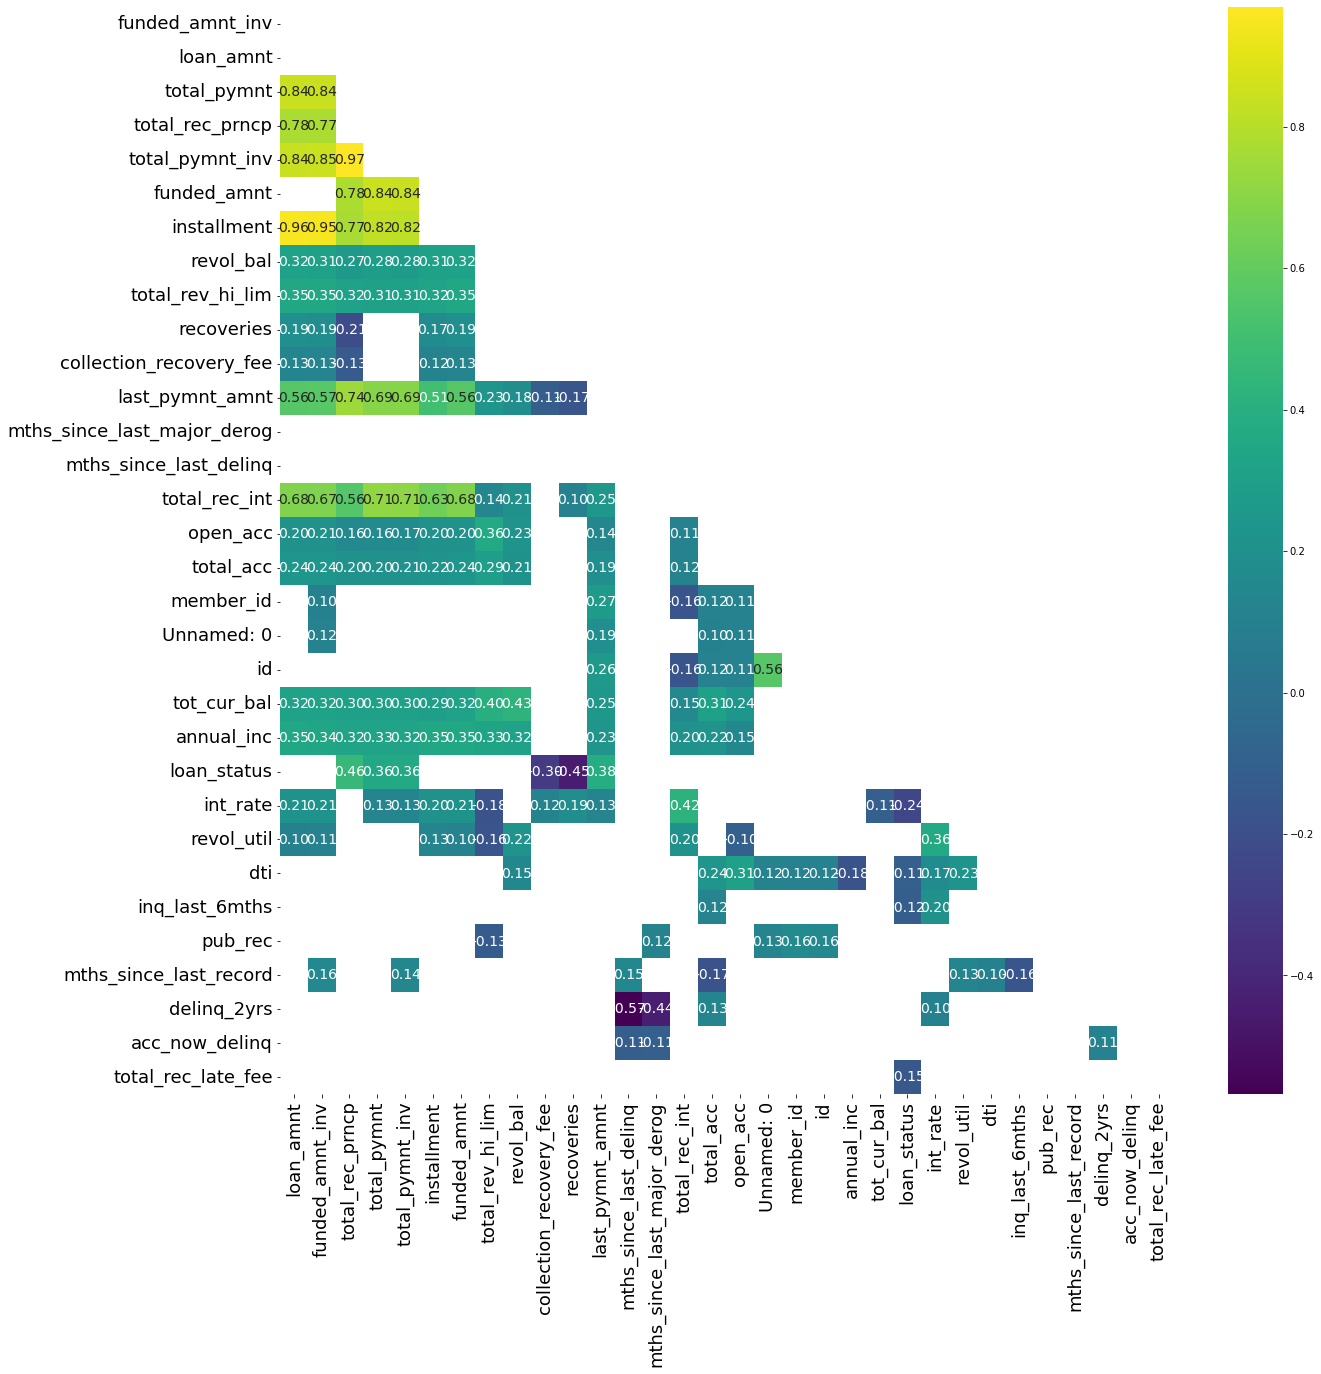

In [69]:
# Tampilkan heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr, 
    annot=True, 
    mask=filter,
    fmt=".2f", 
    cmap="viridis", 
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

Dari heatmap diatas terdapat beberapa variabel yang memiliki pengaruh terhadap status pinjaman, diantaranya:

In [70]:
affect_loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
affect_loan

total_rec_prncp            0.460338
recoveries                 0.445422
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
collection_recovery_fee    0.300094
int_rate                   0.241059
total_rec_late_fee         0.152231
inq_last_6mths             0.116393
dti                        0.107257
dtype: float64

Sedangkan fitur yang saling berkorelasi dengan yang sebelumnya perlu kita identifikasi. Kita menggunakan nilai batas 0.9 untuk mencari fitur yang saling berkorelasi kuat.

In [71]:
threshold = 0.9
affect_collision = (high_corr.abs()
                             .loc[high_corr > threshold]
                             .loc[affect_loan.index, affect_loan.index]
                             .sort_values(ascending=False)
)
affect_collision

total_rec_prncp  total_pymnt        0.975030
total_pymnt      total_rec_prncp    0.975030
total_rec_prncp  total_pymnt_inv    0.969473
total_pymnt_inv  total_rec_prncp    0.969473
dtype: float64


Fitur yang saling berkorelasi akan dipilih berdasarkan yang paling berpengaruh berdasarkan besar pengaruhnya terhadap status pinjaman, 


In [72]:
left_index = affect_collision.index.get_level_values(0)
right_index = affect_collision.index.get_level_values(1)

def remove_collide_index(left_index, right_index):
    include, exclude = [], []

    for left, right in zip(left_index, right_index):
        if left not in include and left not in exclude:
            include.append(left)
        if right not in include and right not in exclude:
            exclude.append(right)
        
    return include, exclude


include_affect_col, exclude_affect_col = remove_collide_index(left_index, right_index)
include_affect_col, exclude_affect_col

(['total_rec_prncp'], ['total_pymnt', 'total_pymnt_inv'])


Fitur numerik berpengaruh yang akan kita gunakan


In [73]:
affect_numerical = affect_loan[~affect_loan.index.isin(exclude_affect_col)].index.to_list()
affect_numerical

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti']


## Status Pinjaman dan Besar Pinjaman Pokok yang Sudah Dibayarkan

Principal adalah besar pinjaman pokok yang dipinjamkan kepada debitur. Dengan kata lain merupakan jumlah asli dari uang yang dipinjamkan. Orang yang mengalami gagal bayar kebanyakan belum dapat membayarkan uang pokok pembayaran hingga jatuh tempo, bisa dilihat dari distribusi pembayaran dibawah. Rata-ratanya hampir mencapai 0.

In [74]:
#buat plot 
def plot_distribution(df, x, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()

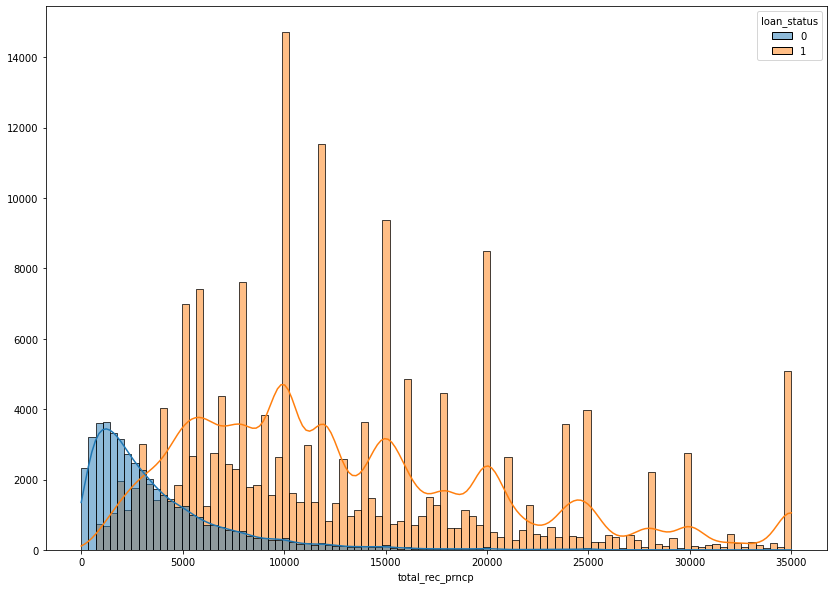

In [75]:
plot_distribution(df=inter_df, x="total_rec_prncp", hue="loan_status", title="")

## Status Pinjaman dan Total Uang yang Tidak Ditagihkan

Charged off recoveries adalah total uang yang tidak bisa dibayarkan kepada perusahaan peminjam karena sudah lewat masa jatuh tempo sehingga perusahaan peminjam bisa melepas hak tagih utang tersebut dengan menjualnya ke perusahaan lain. Dari sini terlihat jelas bahwa orang dengan status pinjaman buruk lah yang paling banyak memiliki charge off recoveries.

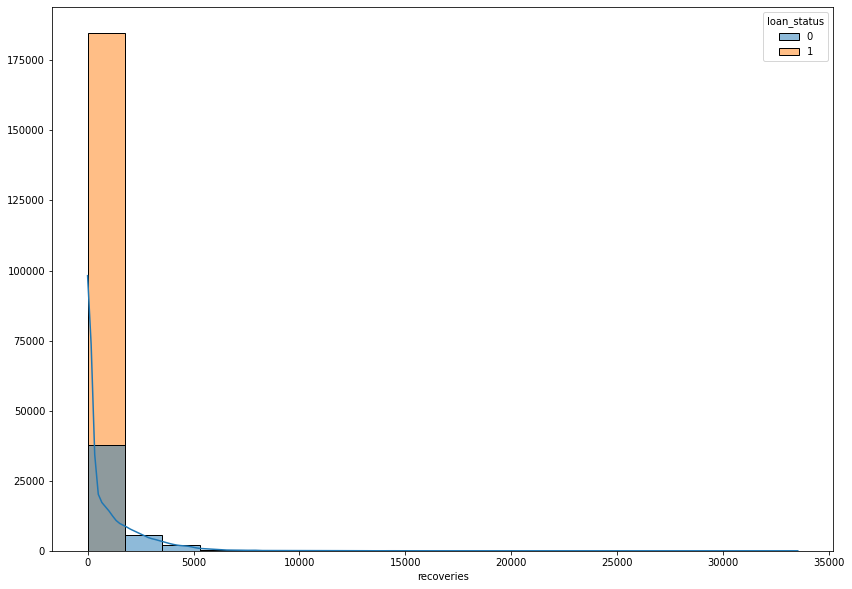

In [76]:
plot_distribution(df=inter_df, x="recoveries", hue="loan_status", title="")

## Status Pinjaman dan Jumlah Pinjaman

In [77]:
#buat plot
def plot_boxplot(df, x, y, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

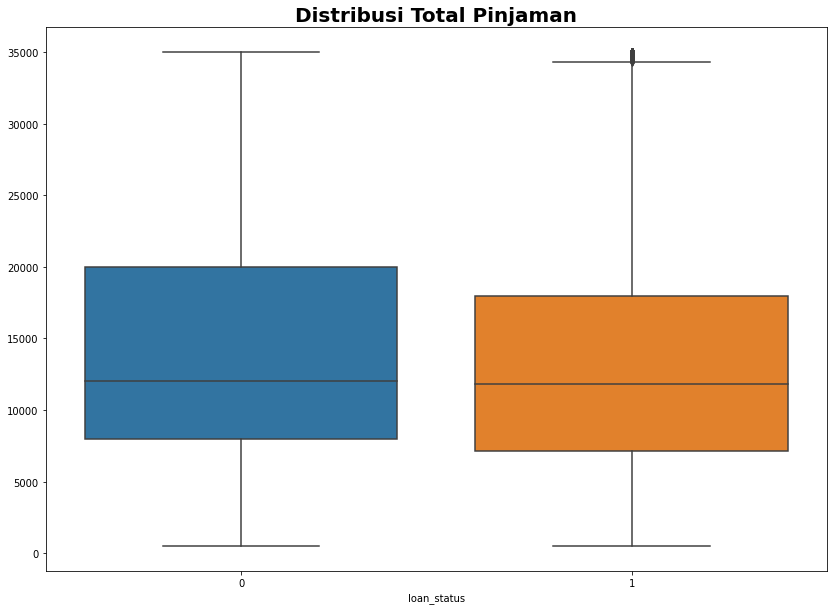

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,14205.570393,8362.468087,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [78]:
x, y = "loan_status", "loan_amnt"
plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pinjaman")
inter_df.groupby(x)[y].describe()

Rata-rata jumlah pinjaman terbanyak berada pada status **buruk**.

## Status Pinjaman dan Total Pembayaran yang Diterima

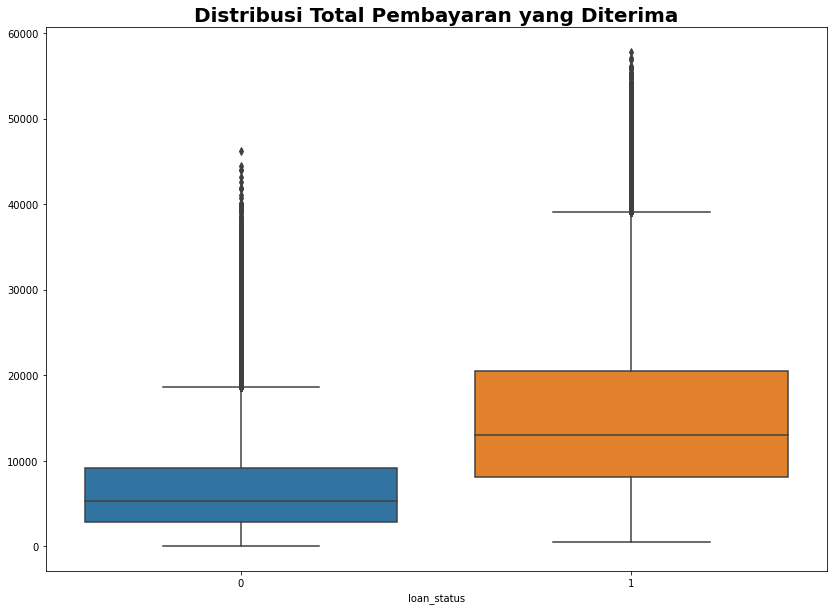

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,6814.461231,5610.294962,0.00,2829.912500,5260.94000,9120.685,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [79]:
x, y = "loan_status", "total_pymnt"
plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pembayaran yang Diterima")
inter_df.groupby(x)[y].describe()

Tampak jelas apabila total pembayaran terbanyak berada pada pinjaman yang berstatus **baik**

# **Preprocessing Data**


## Menghilangkan fitur yang tidak terpakai

Setelah melihat info dan deskripsi dari data diatas, terdapat fitur yang tidak perlu kita pakai karena tidak begitu signifikan untuk digunakan sebagai fitur dalam prediksi.

In [81]:
# Informasi rinci mengenai kolom dan baris data
data_new = pd.DataFrame()
data_new.index = inter_df.columns
data_new["unique_value"] = inter_df.nunique()
data_new["missing_rate"] = inter_df.isna().mean()
data_new["dtype"] = inter_df.dtypes
data_new

,unique_value,missing_rate,dtype
Unnamed: 0,230795,0.000000,int64
id,230795,0.000000,int64
member_id,230795,0.000000,int64
loan_amnt,1308,0.000000,int64
funded_amnt,1311,0.000000,int64
funded_amnt_inv,9552,0.000000,float64
term,2,0.000000,object
int_rate,505,0.000000,float64
installment,43071,0.000000,float64
grade,7,0.000000,object


In [82]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Unnamed: 0 to inq_last_12m
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unique_value  75 non-null     int64  
 1   missing_rate  75 non-null     float64
 2   dtype         75 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [83]:
# Kolom yang semua datanya hilang
miss_col = data_new[data_new["missing_rate"] >= 1].index.to_list()
print("Kolom yang semua datanya hilang:")
print(miss_col)
print()

# Kolom yang terlalu unik
vari_col = data_new[data_new["unique_value"] == inter_df.shape[0]].index.to_list()
print("Kolom yang terlalu unik:")
print(vari_col)
print()

# Kolom dengan kategori yang banyak
cat_col_new = data_new[data_new["dtype"] == "object"]
vari_cat_col = cat_col_new[cat_col_new["unique_value"] > 1000].index.to_list()
print("Kolom dengan kategori yang banyak:")
print(vari_cat_col)
print()

# Kolom yang terdiri dari satu nilai
single_valued_col = data_new[data_new["unique_value"] == 1].index.to_list()
print("Kolom yang terlalu unik:")
print(single_valued_col)
print()

removed_features = miss_col + vari_col + vari_cat_col + single_valued_col

Kolom yang semua datanya hilang:
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Kolom yang terlalu unik:
['Unnamed: 0', 'id', 'member_id', 'url']

Kolom dengan kategori yang banyak:
['emp_title', 'url', 'desc', 'title']

Kolom yang terlalu unik:
['policy_code', 'application_type']



In [84]:
# Hilangkan fitur yang tidak terpakai
pre_df = inter_df.loc[:, ~inter_df.columns.isin(removed_features)].copy()
pre_df.shape

(230795, 49)

### Fitur Kategorikal

In [85]:
# Kolom-kolom yang berdata kategorik
feat_cats2 = pre_df.select_dtypes(include=object).columns
feat_cats2

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


**Kolom yang berisikan tanggal**

In [86]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]

for col in date_cols:
    print(pre_df[col].value_counts().iloc[:5])
    print()

Oct-14    8808
Jul-14    8614
Apr-14    6744
Nov-13    6665
Oct-13    6653
Name: issue_d, dtype: int64

Oct-00    1972
Oct-99    1837
Nov-00    1796
Oct-01    1779
Aug-00    1758
Name: earliest_cr_line, dtype: int64

Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: last_pymnt_d, dtype: int64

Jan-16    93758
Dec-15    13753
Nov-15     8199
Sep-15     7942
Oct-15     7805
Name: last_credit_pull_d, dtype: int64

Feb-16    795
Mar-11    107
Apr-11    101
Feb-11     91
Jan-11     79
Name: next_pymnt_d, dtype: int64



Tidak terdapat korelasi yang kuat antar tanggal serta tiap tanggal memiliki sedikit korelasi dengan status pinjaman. Namun kita akan menghapus fitur tanggal yang berkorelasi kurang dari 0.1 dengan status pinjaman


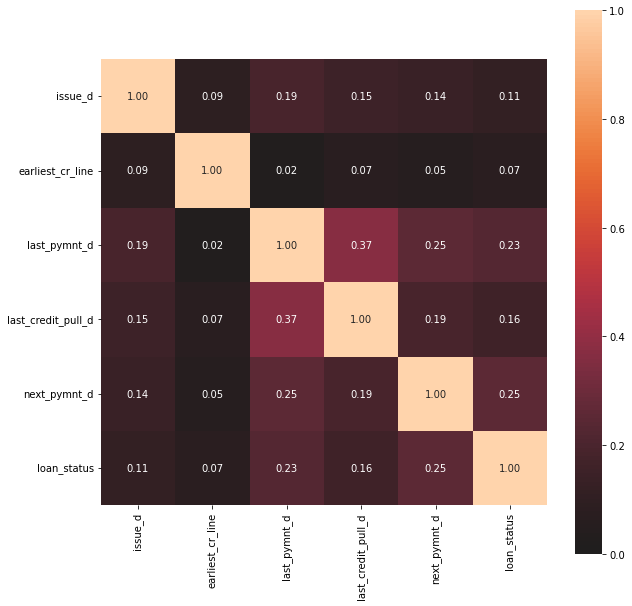

In [87]:
# Korelasi antar tanggal dan status pinjaman
used_cols = date_cols + ["loan_status"] 
complete_correlation = associations(
    pre_df[used_cols], 
    filename='date_correlation.png',
    figsize=(10,10)
)

In [88]:
# Fitur tanggal yang akan kita gunakan
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

In [89]:
# Hapus fitur tanggal yang tidak memiliki korelasi kuat dengan status pinjaman
unused_cols = ["earliest_cr_line"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,860xx,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,309xx,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,606xx,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,917xx,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,852xx,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN



**Kolom Kategorik yang Tidak Terpakai**

In [90]:
other_cat_cols = feat_cats2[~feat_cats2.isin(date_cols + unused_cols)]
other_cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [91]:
pre_df.loc[:, other_cat_cols].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f




Beberapa kolom kategorikal yang tidak terpakai adalah:

- `desc` dan `title` karena merupakan teks.
- `zip_code` karena 3 angka dibelakangnya disensor
- `sub_grade` karena sudah memiliki kolom yang mirip yaitu grade



In [92]:
unused_cols = ["desc", "zip_code", "sub_grade", "title"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [93]:
other_cat_cols = feat_cats2[~feat_cats2.isin(date_cols + unused_cols)]
other_cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

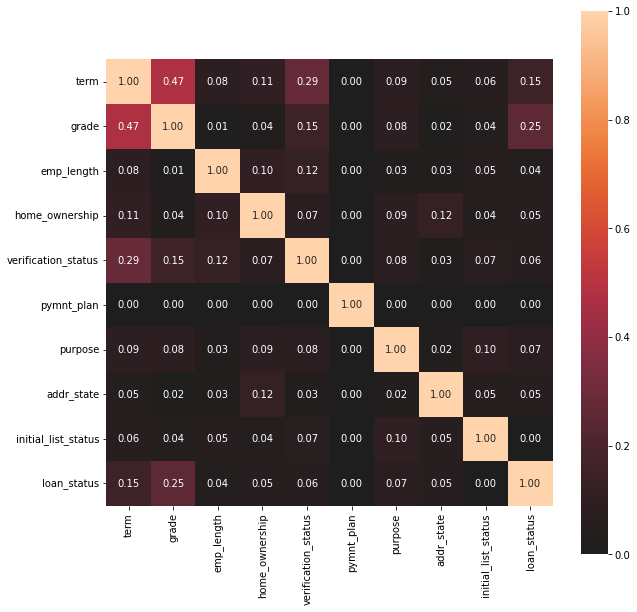

In [94]:
# Korelasi antar fitur kategorikal dan status pinjaman
used_cols = other_cat_cols.to_list() + ["loan_status"]
complete_correlation = associations(
    pre_df[used_cols], 
    filename='cat_correlation.png',
    figsize=(10,10)
)



Fitur grade dan term memiliki sedikit korelasi dengan status pinjaman.


In [95]:
# Fitur kategorikal yang akan kita gunakan
affect_cat_cols = ["grade", "term"]
affect_cat_cols

['grade', 'term']

In [96]:
# Hapus fitur yang kurang berpengaruh
used_cols = ["emp_title", "grade", "term"]
unused_cols = other_cat_cols[~other_cat_cols.isin(used_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,Dec-11,1,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,Dec-11,0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,Dec-11,1,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,Dec-11,1,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,Dec-11,1,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


**Fitur yang berkorelasi dengan target**

In [98]:
# Kolom-kolom yang akan kita gunakan
predictor_cols = affect_numerical + affect_cat_cols + affect_date_cols
predictor_cols



['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti',
 'grade',
 'term',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d']

## Handling Missing Value

In [107]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.984484
last_pymnt_d               0.001629
inq_last_6mths             0.000126
last_credit_pull_d         0.000100
total_rec_prncp            0.000000
recoveries                 0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
int_rate                   0.000000
total_rec_late_fee         0.000000
dti                        0.000000
grade                      0.000000
term                       0.000000
issue_d                    0.000000
dtype: float64

Missing value terbanyak dimiliki oleh fitur `next_pyment_d` karena bisa jadi peminjam yang sudah melunasi utangnya tidak akan memiliki jadwal pembayaran lagi.

In [99]:
# Isi data dengan "no"
pre_df["next_pymnt_d"] = pre_df["next_pymnt_d"].fillna("no")
top_next_pyment_d = pre_df["next_pymnt_d"].value_counts().head()
top_next_pyment_d

no        227214
Feb-16       795
Mar-11       107
Apr-11       101
Feb-11        91
Name: next_pymnt_d, dtype: int64

In [100]:
pre_df["last_pymnt_d"] = pre_df["last_pymnt_d"].fillna("no")
pre_df["last_credit_pull_d"] = pre_df["last_credit_pull_d"].fillna("no")

Isi missing value data numerik menggunakan nilai modus


In [101]:
mode = pre_df["inq_last_6mths"].mode().values[0]
pre_df["inq_last_6mths"] = pre_df["inq_last_6mths"].fillna(mode)



Cek kembali apakah masih ada data yang hilang


In [102]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

total_rec_prncp            0.0
recoveries                 0.0
last_pymnt_amnt            0.0
collection_recovery_fee    0.0
int_rate                   0.0
total_rec_late_fee         0.0
inq_last_6mths             0.0
dti                        0.0
grade                      0.0
term                       0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
next_pymnt_d               0.0
dtype: float64

# **Pembuatan Model**

## Tentukan Label dan Fitur Data

Label merupakan tingkat performa dari pinjaman yang berada pada kolom loan_status. Berhubung kolom tersebut memiliki beberapa kategori, kita sudah memilih dan menggabungkannya menjadi 2 kategori yaitu baik dan buruk.

Sebelumnya, kita perlu memisahkan label dan fitur dari data untuk kemudian dapat dilakukan pemisahan data.


In [103]:
label = pre_df["loan_status"].copy()
features = pre_df[predictor_cols].copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

Label shape:
(230795,)
Features shape:
(230795, 14)


## Preprocessing

In [104]:
num_features = features.select_dtypes(exclude="object")
cat_features = features.select_dtypes(include="object")

In [105]:
# Normalisasi fitur numerik
num_features = (num_features - num_features.mean()) / num_features.std()
num_features

,total_rec_prncp,recoveries,last_pymnt_amnt,collection_recovery_fee,int_rate,total_rec_late_fee,inq_last_6mths,dti
0,-0.765957,-0.222400,-0.822146,-0.149837,-0.716859,-0.139146,0.078612,1.472931
1,-1.320543,-0.071386,-0.829680,-0.140651,0.340654,-0.139146,3.480063,-2.000498
2,-1.083314,-0.222400,-0.752787,-0.149837,0.498595,-0.139146,0.928975,-0.994312
3,-0.155655,-0.222400,-0.795193,-0.149837,-0.066786,2.788316,0.078612,0.475868
5,-0.765957,-0.222400,-0.823681,-0.149837,-1.346331,-0.139146,1.779338,-0.671081
...,...,...,...,...,...,...,...,...
466276,-1.332307,1.273040,-0.815471,-0.053887,1.022774,-0.139146,-0.771750,-0.530319
466277,-0.817113,-0.222400,-0.765357,-0.149837,-1.346331,-0.139146,-0.771750,-0.784472
466278,-0.155655,-0.222400,-0.049229,-0.149837,1.022774,-0.139146,-0.771750,-0.622857
466281,-1.152029,-0.222400,-0.844495,-0.149837,1.416480,-0.139146,3.480063,0.273848


In [106]:
# OneHotEncode fitur kategorik
cat_features = pd.get_dummies(cat_features)
cat_features

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Aug-12,issue_d_Aug-13,issue_d_Aug-14,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Dec-12,issue_d_Dec-13,issue_d_Dec-14,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Feb-12,issue_d_Feb-13,issue_d_Feb-14,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jan-12,issue_d_Jan-13,issue_d_Jan-14,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,...,next_pymnt_d_Jul-15,next_pymnt_d_Jun-08,next_pymnt_d_Jun-09,next_pymnt_d_Jun-10,next_pymnt_d_Jun-11,next_pymnt_d_Jun-12,next_pymnt_d_Jun-13,next_pymnt_d_Jun-14,next_pymnt_d_Jun-15,next_pymnt_d_Mar-08,next_pymnt_d_Mar-09,next_pymnt_d_Mar-10,next_pymnt_d_Mar-11,next_pymnt_d_Mar-12,next_pymnt_d_Mar-13,next_pymnt_d_Mar-14,next_pymnt_d_Mar-15,next_pymnt_d_May-08,next_pymnt_d_May-09,next_pymnt_d_May-10,next_pymnt_d_May-11,next_pymnt_d_May-12,next_pymnt_d_May-13,next_pymnt_d_May-14,next_pymnt_d_May-15,next_pymnt_d_Nov-08,next_pymnt_d_Nov-09,next_pymnt_d_Nov-10,next_pymnt_d_Nov-11,next_pymnt_d_Nov-12,next_pymnt_d_Nov-13,next_pymnt_d_Nov-14,next_pymnt_d_Nov-15,next_pymnt_d_Oct-08,next_pymnt_d_Oct-09,next_pymnt_d_Oct-10,next_pymnt_d_Oct-11,next_pymnt_d_Oct-12,next_pymnt_d_Oct-13,next_pymnt_d_Oct-14,next_pymnt_d_Oct-15,next_pymnt_d_Sep-08,next_pymnt_d_Sep-09,next_pymnt_d_Sep-10,next_pymnt_d_Sep-11,next_pymnt_d_Sep-12,next_pymnt_d_Sep-13,next_pymnt_d_Sep-14,next_pymnt_d_Sep-15,next_pymnt_d_no
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466277,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466278,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [107]:
# Gabungkan Fitur
features_full = pd.concat([num_features, cat_features], axis=1)
features_full.shape

(230795, 411)

## Splitting Data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(features_full, label, test_size=0.25, random_state=42, stratify=label)
X_train.shape, y_train.shape

((173096, 411), (173096,))

## Model

In [109]:
logres = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logres

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [110]:
logres.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

## Menyimpan Model

In [111]:
joblib.dump(logres, "logres.z")

['logres.z']

## Evaluasi Model


### Baseline Model

Kita akan membuat model prediksi paling sederhana yaitu dengan memprediksi seluruh data kategori terbanyak. Hal ini dilakukan supaya kita mendapatkan patokan, berapa performa minimal yang harus dilalui oleh model machine learning kita nantinya.


In [112]:
test_label_counts = y_test.value_counts()
test_label_counts

1    46185
0    11514
Name: loan_status, dtype: int64

In [113]:
test_label_counts.max() / test_label_counts.sum()

0.8004471481308169

### Metrik Evaluasi

**Train**

In [114]:
logres.score(X_train, y_train)

0.9669894162776725

In [115]:
report = classification_report(y_true=y_train, y_pred=logres.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     34542
           1       0.99      0.97      0.98    138554

    accuracy                           0.97    173096
   macro avg       0.93      0.97      0.95    173096
weighted avg       0.97      0.97      0.97    173096



**Test**

In [116]:
logres.score(X_test, y_test)

0.9673131250108321

In [117]:
report = classification_report(y_true=y_test, y_pred=logres.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     11514
           1       0.99      0.97      0.98     46185

    accuracy                           0.97     57699
   macro avg       0.94      0.97      0.95     57699
weighted avg       0.97      0.97      0.97     57699



**Confusion Matrix**

In [118]:
conf = confusion_matrix(y_true=y_test, y_pred=logres.predict(X_test))

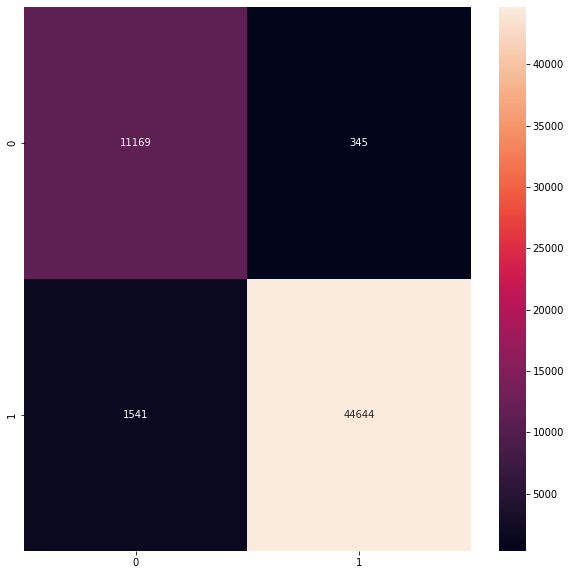

In [119]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()